In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pygtc
    
import sys 
sys.path.insert(0, '../src/')

import warnings; warnings.simplefilter('ignore')
# import emcee
# import corner
# from multiprocess import Pool
# from astropy.table import Table
# import pygtc
import jsm_SHMR
from astropy.table import Table
from IPython.display import display, Math


In [3]:
def stack(samples, stack):    
    nsteps = samples.shape[0]
    ssteps = nsteps - stack
    s = samples[ssteps:nsteps,:,:].shape
    return samples[ssteps:nsteps,:,:].reshape(s[0] * s[1], s[2]) 

def best_fit_values(sample, labels):
    list_val = []
    for i in range(4):
        mcmc = np.percentile(sample[:, i], [16, 50, 84])
        q = np.diff(mcmc)
        txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
        txt = txt.format(mcmc[1], q[0], q[1], labels[i])
        #display(Math(txt))
        list_val.append([mcmc[1], q[0], q[1]])
    return np.array(list_val)

def cross_sample(samples, xaxis, xlabel, labels):

    Nsamples = samples.shape[0]
    val_mat = np.zeros(shape=(Nsamples, 4, 3))

    for i in range(Nsamples):
        val_mat[i] = best_fit_values(samples[i], labels)

    fig, axs = plt.subplots(2, 2, sharex=True, figsize=(10,8))

    axs[0,0].errorbar(xaxis, val_mat[:, 0, 0], yerr=[val_mat[:, 0, 1], val_mat[:, 0, 2]], fmt="o", color="black")
    axs[0,0].axhline(1.8, ls=":")
    axs[0,0].set_ylabel("a1")
    axs[0,0].set_ylim(-1,5)

    axs[1,0].errorbar(xaxis, val_mat[:, 1, 0], yerr=[val_mat[:, 1, 1], val_mat[:, 1, 2]], fmt="o", color="black")
    axs[1,0].axhline(-0.2, ls=":")
    axs[1,0].set_xlabel(xlabel)
    axs[1,0].set_ylabel("a2")
    axs[1,0].set_ylim(-2,1)

    axs[0,1].errorbar(xaxis, val_mat[:, 2, 0], yerr=[val_mat[:, 2, 1], val_mat[:, 2, 2]], fmt="o", color="black")
    axs[0,1].axhline(0.4, ls=":")
    axs[0,1].set_ylabel("a3")
    axs[0,1].set_ylim(0,4)


    axs[1,1].errorbar(xaxis, val_mat[:, 3, 0], yerr=[val_mat[:, 3, 1], val_mat[:, 3, 2]], fmt="o", color="black")
    axs[1,1].axhline(10.1, ls=":")
    axs[1,1].set_xlabel(xlabel)
    axs[1,1].set_ylabel("a4")
    axs[1,1].set_ylim(9,11)
    plt.show()   

In [4]:
labels =  ["a1", "a2", "a3", "a4"]

In [6]:
# s100 = np.load("../../data/Nsaga/100/samples.npy")

# s500 = np.load("../../data/Nsaga/500/samples.npy")

# s1000 = np.load("../../data/Nsaga/1000/samples.npy")

# stack100 = stack(s100, 450)
# stack500 = stack(s500, 450)
# stack1000 = stack(s1000, 450)

# cross_sample(np.array([stack100, stack500, stack1000]), [100, 500, 1000], "N hosts", labels)
# # Labels for the different chains
# chainLabels = ["N=100", "N=500", "N=1000"]

# # List of Gaussian curves to plot
# #(to represent priors): mean, width
# # Empty () or None if no prior to plot
# priors = ((1, 3), (-2, 1), (0, 3), (9,11))

# truths = [1.8, -0.2, 0.4, 10.1]


# GTC = pygtc.plotGTC(chains=[stack100, stack500, stack1000], 
#                     paramNames=labels,
#                     chainLabels=chainLabels,
#                     truths=truths,
#                     nContourLevels=2,
#                     figureSize=12,
#                     smoothingKernel=1,
#                     filledPlots=False,
#                     customTickFont={'family':'Arial', 'size':12},
#                     customLegendFont={'family':'Arial', 'size':15},
#                     customLabelFont={'family':'Arial', 'size':12})

In [7]:
s55 = np.load("../../data/min_mass/MM_5_5/samples.npy")

s60 = np.load("../../data/min_mass/MM_6_0/samples.npy")

s65 = np.load("../../data/min_mass/MM_6_5/samples.npy")

In [8]:
stack55 = stack(s55, 100)

stack60 = stack(s60, 100)

stack65 = stack(s65, 100)

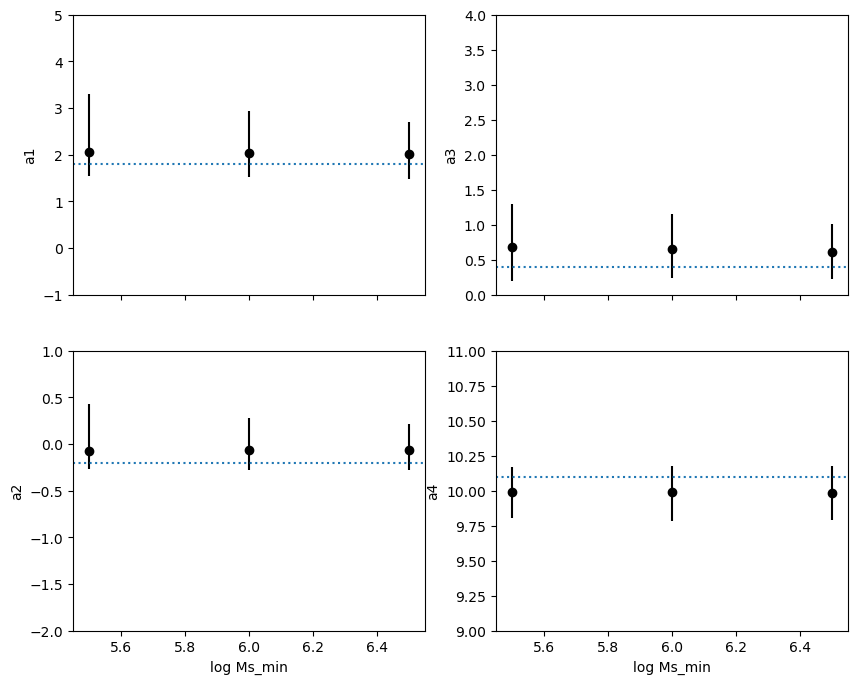

In [9]:
cross_sample(np.array([stack55, stack60, stack65]), [5.5, 6.0, 6.5], "log Ms_min", labels)

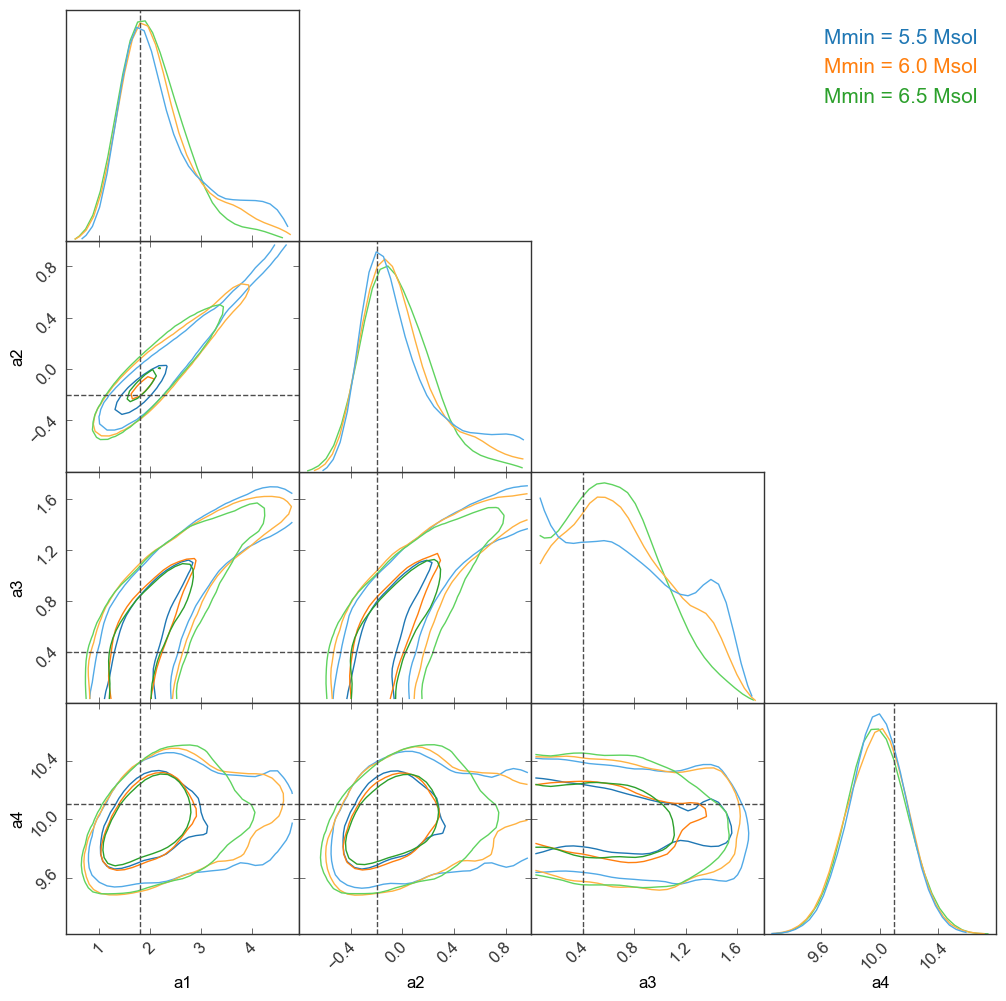

In [10]:
names = ['a1', 'a2', 'a3', 'a4']

# Labels for the different chains
chainLabels = ["Mmin = 5.5 Msol", "Mmin = 6.0 Msol", "Mmin = 6.5 Msol"]

# List of Gaussian curves to plot
#(to represent priors): mean, width
# Empty () or None if no prior to plot
priors = ((0, 5), (-3, 2), (0, 5), (9,11))

truths = [1.8, -0.2, 0.4, 10.1]

GTC = pygtc.plotGTC(chains=[stack55, stack60, stack65], 
                    paramNames=labels,
                    chainLabels=chainLabels,
                    truths=truths,
                    nContourLevels=2,
                    figureSize=12,
                    smoothingKernel=1.3,
                    filledPlots=False,
                    customTickFont={'family':'Arial', 'size':12},
                    customLegendFont={'family':'Arial', 'size':15},
                    customLabelFont={'family':'Arial', 'size':12})

In [13]:
s1 = np.load("../../data/init_val/start8/samples.npy")

s2 = np.load("../../data/init_val/start9/samples.npy")

s3 = np.load("../../data/init_val/start3/samples.npy")

s4 = np.load("../../data/init_val/start4/samples.npy")

In [14]:
stack1 = stack(s1, 100)
stack2 = stack(s2, 100)
stack3 = stack(s3, 100)
stack4 = stack(s4, 100)

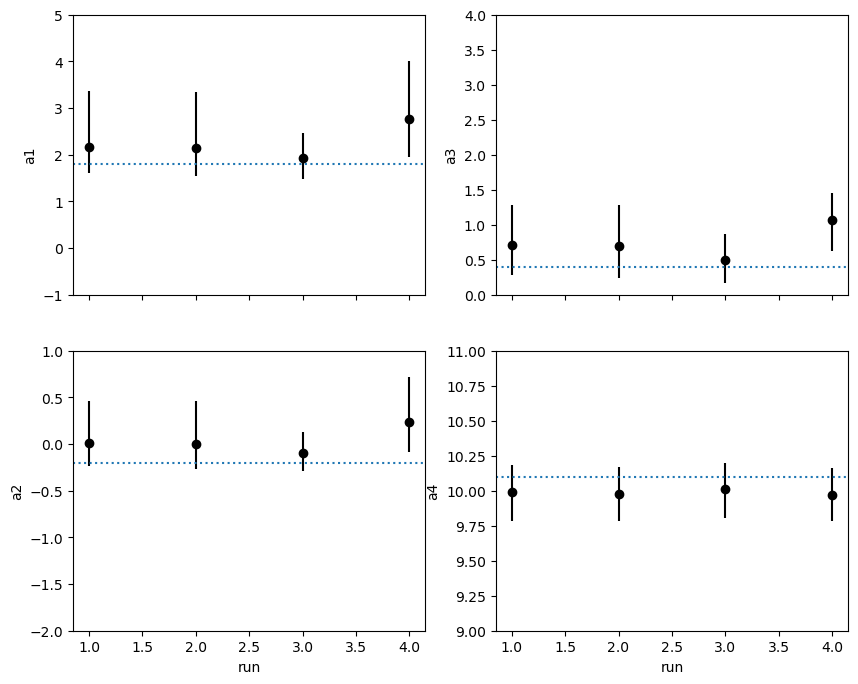

In [15]:
cross_sample(np.array([stack1, stack2, stack3, stack4]), [1, 2, 3, 4], "run", labels)

In [16]:
theta1 = "[2.6, 0.2, 0, 11] (big)" 

theta2 =  "[3.1, 0.2, 1.8, 9.7] (big)"

theta3 = "[2.6, 0.2, 0, 11]"

theta4 = "[3.1, 0.2, 1.8, 9.7]"

#start_theta = [1.8, -1, 0.5, 10.1] # a somewhat random starting place 5

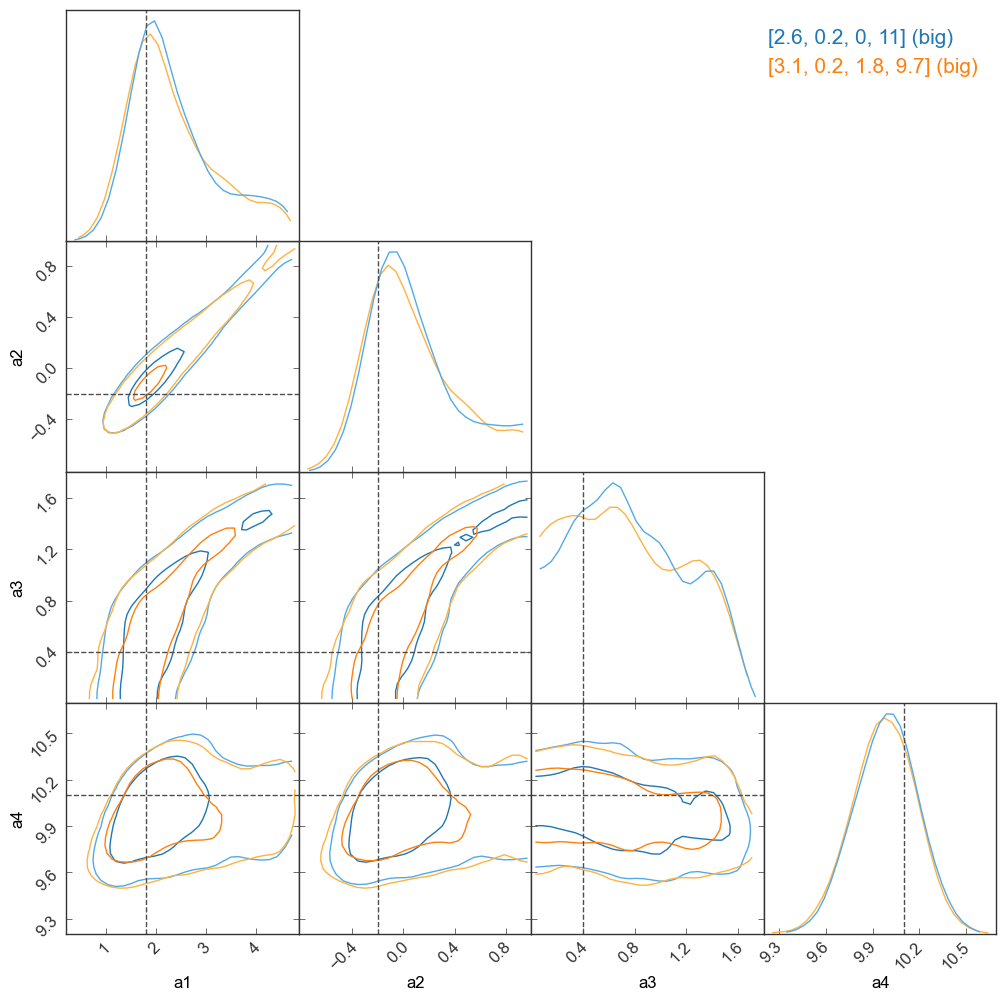

In [17]:
# Labels for the different chains
chainLabels = [theta1, theta2]

# List of Gaussian curves to plot
#(to represent priors): mean, width
# Empty () or None if no prior to plot
priors = ((0, 5), (-3, 2), (0, 5), (9,11))

truths = [1.8, -0.2, 0.4, 10.1]

GTC = pygtc.plotGTC(chains=[stack1, stack2], 
                    paramNames=labels,
                    chainLabels=chainLabels,
                    truths=truths,
                    nContourLevels=2,
                    figureSize=12,
                    smoothingKernel=1.3,
                    filledPlots=False,
                    customTickFont={'family':'Arial', 'size':12},
                    customLegendFont={'family':'Arial', 'size':15},
                    customLabelFont={'family':'Arial', 'size':12})

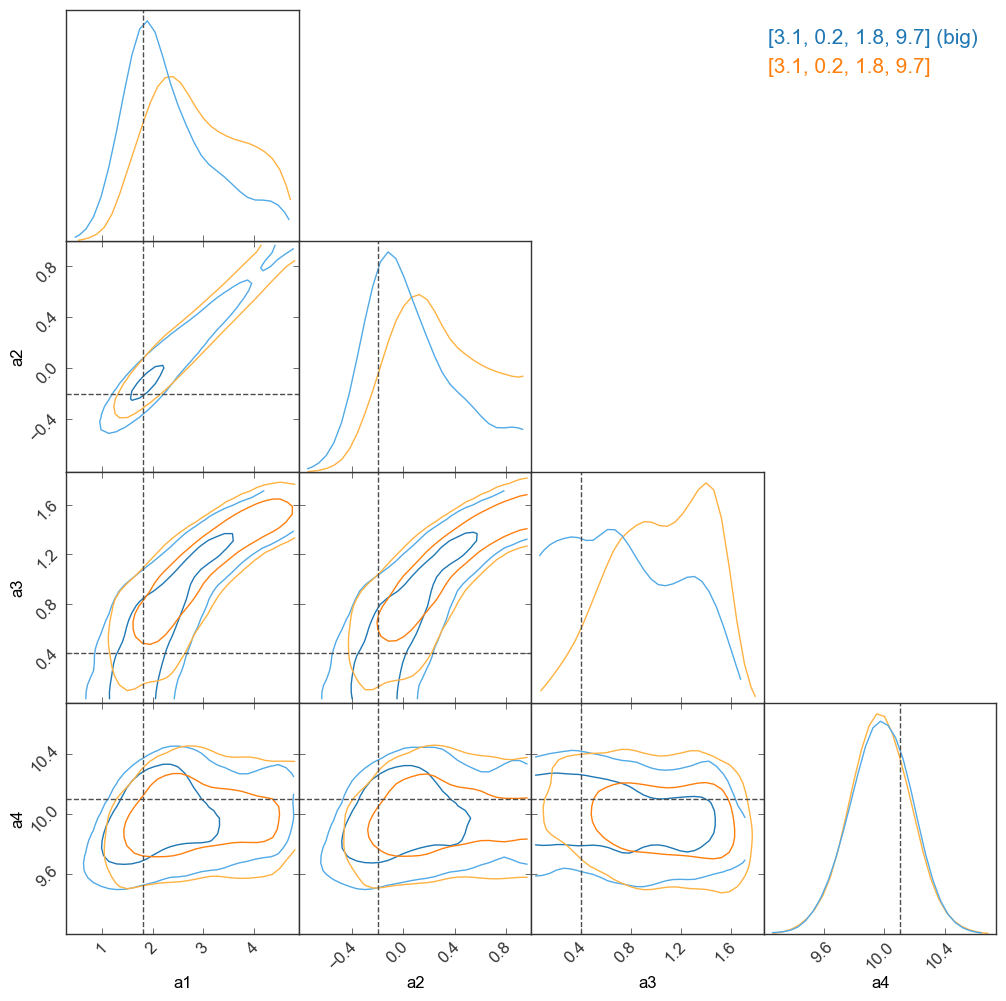

In [19]:
# Labels for the different chains
chainLabels = [theta2, theta4]

# List of Gaussian curves to plot
#(to represent priors): mean, width
# Empty () or None if no prior to plot
priors = ((0, 5), (-3, 2), (0, 5), (9,11))

truths = [1.8, -0.2, 0.4, 10.1]

GTC = pygtc.plotGTC(chains=[stack2, stack4], 
                    paramNames=labels,
                    chainLabels=chainLabels,
                    truths=truths,
                    nContourLevels=2,
                    figureSize=12,
                    smoothingKernel=1.3,
                    filledPlots=False,
                    customTickFont={'family':'Arial', 'size':12},
                    customLegendFont={'family':'Arial', 'size':15},
                    customLabelFont={'family':'Arial', 'size':12})

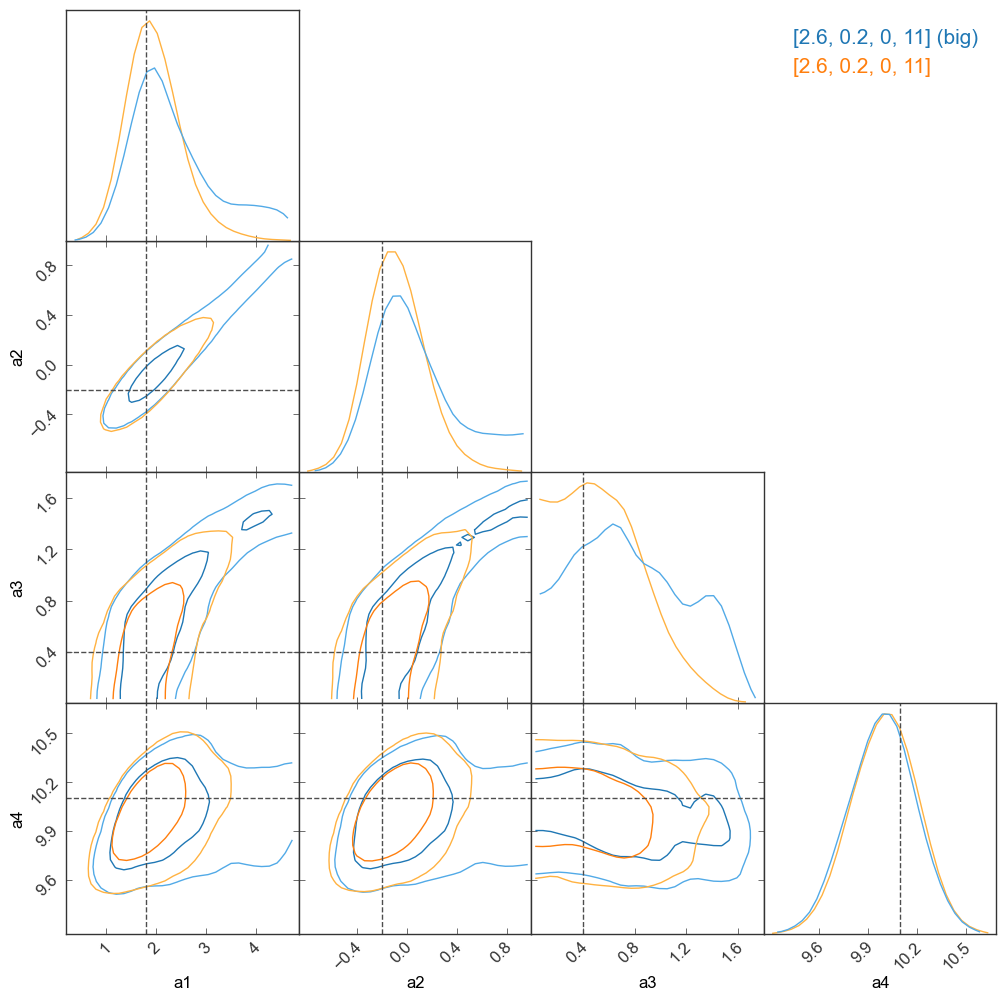

In [20]:
# Labels for the different chains
chainLabels = [theta1, theta3]

# List of Gaussian curves to plot
#(to represent priors): mean, width
# Empty () or None if no prior to plot
priors = ((0, 5), (-3, 2), (0, 5), (9,11))

truths = [1.8, -0.2, 0.4, 10.1]

GTC = pygtc.plotGTC(chains=[stack1, stack3], 
                    paramNames=labels,
                    chainLabels=chainLabels,
                    truths=truths,
                    nContourLevels=2,
                    figureSize=12,
                    smoothingKernel=1.3,
                    filledPlots=False,
                    customTickFont={'family':'Arial', 'size':12},
                    customLegendFont={'family':'Arial', 'size':15},
                    customLabelFont={'family':'Arial', 'size':12})

In [10]:
bad_thetas = np.array([[2.4, 1, 3, 9.1], [1.8, -1, 0.5, 10.1], [1, 0.5, 0.4, 10.1]])
bad_thetas

array([[ 2.4,  1. ,  3. ,  9.1],
       [ 1.8, -1. ,  0.5, 10.1],
       [ 1. ,  0.5,  0.4, 10.1]])

In [ ]:
# samples = np.load("../../data/MCMC/sampler_results_sep17.npy")
# last_sample = samples[-1,:,:]
# fig = corner.corner(last_sample_F, show_titles=True, quantiles=[0.16, 0.5, 0.84], plot_contours=False, range=[(0, 5), (-2, 2), (0, 3)])
# fig = corner.corner(last_sample, show_titles=True, quantiles=[0.16, 0.5, 0.84], plot_contours=False)
# figure = corner.corner(last_sample_F, plot_contours=False, range=[(0, 5), (-2, 2), (0, 3)])
# corner.corner(last_sample, fig=figure, color='red', plot_contours=False, range=[(0, 5), (-2, 2), (0, 3)])
# plt.show()

# names = ['alpha', 'delta', 'sigma']

# # Labels for the different chains
# chainLabels = ["JSM results", "F vdB results"]

# # List of Gaussian curves to plot
# #(to represent priors): mean, width
# # Empty () or None if no prior to plot
# priors = ((1, 3), (-2, 1), (0, 3))

# truths = [1.9, -0.2, 0.6]

# GTC = pygtc.plotGTC(chains=[last_sample,last_sample_F], 
#                     paramNames=names,
#                     chainLabels=chainLabels,
#                     truths=truths,
#                     figureSize=8,
#                     filledPlots=True)

# samples = np.load("../../data/MCMC/sampler_results_sep20.npy")
# print("steps:", samples.shape[0])
# print("walkers:", samples.shape[1])
# print("dim:", samples.shape[2])
# jsm_last_sample = samples[-1,:,:]
# jsm_last_sample
# final_step = Table.read("../../../Downloads/MCMC_step_1000.dat", format="ascii")
# a1 = final_step["col1"].data
# a2 = final_step["col2"].data
# a3 = final_step["col3"].data
# a4 = final_step["col4"].data

# fvdb_last_sample = np.array([a1, a2, a3, a4]).T
# fvdb_last_sample
# names = ['a1', 'a2', 'a3', 'a4']

# # Labels for the different chains
# chainLabels = ["JSM results", "FvdB results"]

# # List of Gaussian curves to plot
# #(to represent priors): mean, width
# # Empty () or None if no prior to plot
# priors = ((1, 3), (-2, 1), (0, 3), (9,11))

# truths = [1.9, -0.2, 0.6, 10]

# GTC = pygtc.plotGTC(chains=[jsm_last_sample,fvdb_last_sample], 
#                     paramNames=names,
#                     chainLabels=chainLabels,
#                     truths=truths,
#                     figureSize=8,
#                     filledPlots=False)


In [41]:
theta_0 = [1.8, -1, 0.1, 10.1]
ndim = len(theta_0)
nwalkers = 1000

In [42]:
p0 = np.array([np.array(theta_0) + 1e-3 * np.random.randn(ndim) for i in range(nwalkers)])

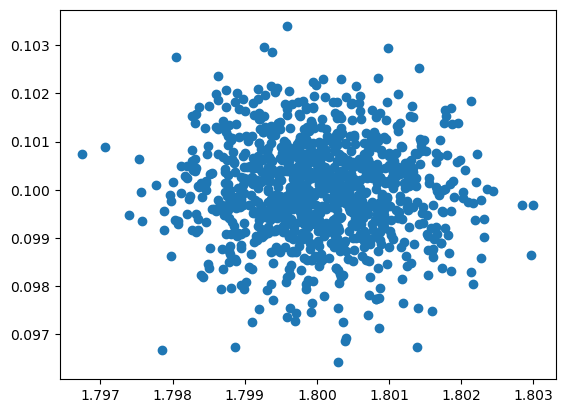

In [43]:
plt.scatter(p0[:,0], p0[:,2])